In [1]:

import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

current_dir = os.getcwd()
information_metrics_dir = os.path.dirname(current_dir)
sys.path.append(information_metrics_dir)

import spatial_metrics.helper_functions as hf
import spatial_metrics.spatial_metrics_calcium_binarized_base as sm
import spatial_metrics.bootstrapped_estimation as be

%matplotlib widget




'''
If you don't have calcium signal, this part simulates the calcium activity
from a place cell in a 2D enviroment.

You should first set your environment edges. You can think of it as a retangular box in cm.
environment_edges = [[0,30],[0,50]] # in cm [[x_min,x_max],[y_min,y_max]]

Now set the number of place fields (if num_of_fields = 0, then the cell is not a place cell),
their location in the enviroment, and their respective sizes.
'''


In [2]:
# Load your data:

output_dict = np.load('simulated_signal.npy',allow_pickle=True).item()
signal = output_dict['signal']
time_vector = output_dict['time_vector']
x_coordinates = output_dict['x_coordinates']
y_coordinates = output_dict['y_coordinates']
modulated_spike_times_idx = output_dict['spike_times']
environment_edges = output_dict['environment_edges']
sampling_rate = output_dict['sampling_rate']

signal_norm = hf.min_max_norm(signal)


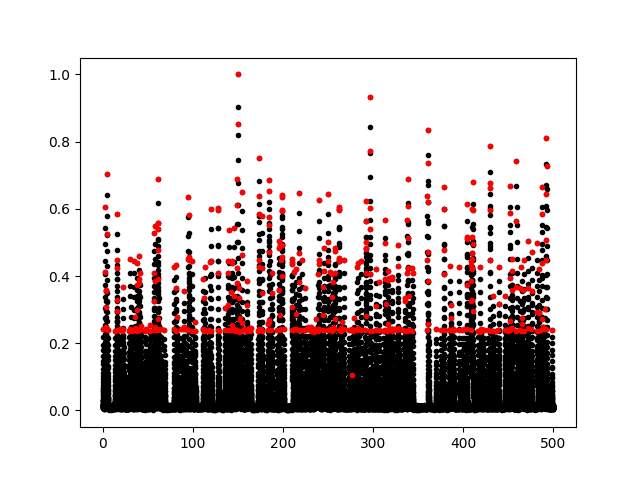

In [3]:
# play with z_threshold just to decide which one is the best for your data

signal_type = 'Binarized'
input_signal = hf.preprocess_signal(signal_norm,sampling_rate,signal_type,z_threshold = 1)

plt.figure()
plt.plot(time_vector,signal_norm,'k.')
plt.plot(time_vector[input_signal==1],signal_norm[input_signal==1],'r.')

# plt.plot(time_vector[input_signal==1],signal_norm[input_signal==1],'r.')

# plt.plot(time_vector,input_signal,'r.')
plt.show()


In [6]:

# Calculate the video sampling rate as the reciprocal of the average time difference between consecutive timestamps.
# This is an approximation for cameras with varying frame rates.
sampling_rate = 1 / np.nanmean(np.diff(time_vector))

# Create a dictionary to hold input parameters for further processing
input_dict = dict()

# Construct the filename and other identifiers for saving the results
input_dict['saving_string'] = 'SpatialMetrics.' + signal_type  # Prefix for the filename
input_dict['animal_id'] = 'NeuronModel'  # Identifier for the animal or model
input_dict['dataset'] = 'Simulation'  # Name of the dataset
input_dict['day'] = 1  # Day or session number
input_dict['neuron'] = 1  # Neuron identifier
input_dict['trial'] = None  # Trial identifier (optional, can be None)
input_dict['saving_path'] = None  # Directory path for saving results (optional, can be None)
input_dict['saving'] = False  # Flag indicating whether to save the results (False means no saving)

# Set parameters related to the signal and environment
input_dict['sampling_rate'] = sampling_rate  # Sampling rate in points per second
input_dict['environment_edges'] = environment_edges  # Coordinates defining the edges of the environment (in cm)

# Set inclusion criteria for the analysis
input_dict['min_time_spent'] = 0  # Minimum time an animal must spend in each xy bin
input_dict['min_visits'] = 0  # Minimum number of visits required in each xy bin
input_dict['min_speed_threshold'] = 0  # Minimum speed threshold in coordinate units

# Set parameters for calculating mutual information
input_dict['x_bin_size'] = 1  # Size of x bins in coordinate units (cm)
input_dict['y_bin_size'] = 1  # Size of y bins in coordinate units (cm)

# Set parameters for surrogate analysis
input_dict['shift_time'] = 200  # Time shift window in seconds for creating surrogate distributions
input_dict['num_cores'] = -1  # Number of CPU cores to use (set to -1 to use all available cores)
input_dict['num_surrogates'] = 80  # Number of surrogate distributions to generate

# Set parameters for plotting place fields
input_dict['smoothing_size'] = 1  # Size of the gaussian smoothing area in bins for plotting place fields

# Set parameters for place fields detection
input_dict['min_num_of_bins'] = 2  # Minimum number of bins required to define a place field

input_dict['field_detection_method'] = 'random_fields'  # place field detection method (std_from_field or random_fields)

input_dict['percentile_threshold'] = 90  # Percentile threshold for determining place field boundaries when field_detection_method = 'random_fields'
input_dict['detection_threshold'] = 1 # place field detection threshold in std when field_detection_method = 'std_from_field'
input_dict['detection_smoothing_size'] = 1  # Size of the smoothing area in bins for detecting place fields when field_detection_method = 'std_from_field'


spatial_metrics = sm.PlaceCellBinarized(**input_dict)
spatial_metrics_output = spatial_metrics.main(input_signal,time_vector,x_coordinates,y_coordinates)


SpatialMetrics.Binarized.NeuronModel.Dataset.Simulation.Day.1.Neuron.1 not saved


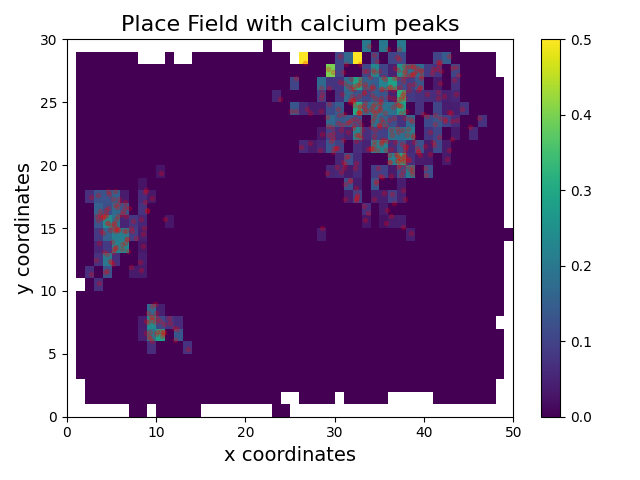

In [7]:

plt.figure()
plt.pcolormesh(spatial_metrics_output['x_center_bins'],spatial_metrics_output['y_center_bins'],spatial_metrics_output['place_field'],shading = 'auto',edgecolors=None)
# plt.pcolormesh(spatial_metrics_output['x_grid'],spatial_metrics_output['y_grid'],spatial_metrics_output['place_field'],edgecolors='red')

plt.plot(spatial_metrics_output['x_peaks_location'],spatial_metrics_output['y_peaks_location'],color = 'red',linestyle='',marker='.',markersize=6,alpha=0.2)
plt.colorbar()
plt.title('Place Field with calcium peaks',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()



In [6]:
from spatial_metrics.validators import ParameterValidator


In [27]:
num_surrogates = -30.0

In [29]:
isinstance(num_surrogates, (int))
num_surrogates <= 0

True

In [30]:
not isinstance(num_surrogates, (int)) or num_surrogates <= 0


True

In [11]:

spatial_metrics_output['sampling_rate'] = 30.
spatial_metrics_output['sampling_rate']


spatial_metrics_output['num_surrogates'] = 30.
spatial_metrics_output['num_surrogates']

ParameterValidator.validate_all(spatial_metrics_output)


<function ParameterValidator.validate_detection_smoothing_size at 0x76535cbd7560>
<function ParameterValidator.validate_detection_threshold at 0x76535cbd74c0>
<function ParameterValidator.validate_environment_edges at 0x76535cbd6fc0>
<function ParameterValidator.validate_field_detection_method at 0x76535cbd6ca0>
<function ParameterValidator.validate_min_num_of_bins at 0x76535cbd7380>
<function ParameterValidator.validate_min_speed_threshold at 0x76535cbd6de0>
<function ParameterValidator.validate_min_time_spent at 0x76535cbd6c00>
<function ParameterValidator.validate_min_visits at 0x76535cbd6d40>
<function ParameterValidator.validate_num_surrogates at 0x76535cbd71a0>


ValueError: num_surrogates must be a positive integer number.

In [11]:
ParameterValidator

__main__.ParameterValidator

In [12]:
validators = {}
# Iterate over all attributes of the class
for name, method in inspect.getmembers(cls, predicate=inspect.isfunction):
    # Check if the method is a static method and its name starts with 'validate_'
    if isinstance(getattr(cls, name), staticmethod) and name.startswith('validate_'):
        # Extract the parameter name by removing the 'validate_' prefix
        param_name = name[len('validate_'):]
        validators[param_name] = method


NameError: name 'cls' is not defined

dict_keys([])


In [35]:
import inspect

class ParameterValidator:
    @staticmethod
    def validate_sampling_rate(value):
        if value is not None:
            if not isinstance(value, (int, float)) or value <= 0:
                raise ValueError("sampling_rate must be a positive number.")

    @staticmethod
    def validate_min_time_spent(value):
        if value is not None:
            if not isinstance(value, (int, float)) or value < 0:
                raise ValueError("min_time_spent must be a non-negative number.")

    @staticmethod
    def validate_field_detection_method(value):
        if value is not None:
            if not isinstance(value, str) or value not in ['std_from_field', 'random_fields']:
                warnings.warn("No valid field detection method set", UserWarning)

    @staticmethod
    def validate_min_visits(value):
        if value is not None:
            if not isinstance(value, (int)) or value < 0:
                raise ValueError("min_visits must be a non-negative integer number.")
            

    @staticmethod
    def validate_min_speed_threshold(value):
        if value is not None:
            if not isinstance(value, (int,float)) or value < 0:
                raise ValueError("min_speed_threshold must be a non-negative  number.")
    
    @staticmethod
    def validate_x_bin_size(value):
        if value is not None:
            if not isinstance(value, (int)) or value <= 0:
                raise ValueError("x_bin_size must be a positive integer number.")

    @staticmethod
    def validate_y_bin_size(value):
        if value is not None:
            if not isinstance(value, (int)) or value <= 0:
                raise ValueError("y_bin_size must be a positive  number.")
            

    @staticmethod
    def validate_environment_edges(value):
        if value is not None:
            if isinstance(value, list):
                if all(isinstance(sublist, list) for sublist in value):
                    # Handle case where value is a list of sublists
                    if len(value) != 2:
                        raise ValueError("environment_edges must contain exactly two sublists.")
                    for sublist in value:
                        if len(sublist) != 2:
                            raise ValueError("Each sublist in environment_edges must contain exactly two numbers.")
                        min_val, max_val = sublist
                        if not all(isinstance(i, (int, float)) for i in (min_val, max_val)):
                            raise ValueError("Each value in the sublists must be a number.")
                        if min_val >= max_val:
                            raise ValueError("In each sublist, the first value (min) must be less than the second value (max).")
                else:
                    # Handle case where value is a single list
                    if len(value) != 2:
                        raise ValueError("environment_edges must contain exactly two numbers.")
                    min_val, max_val = value
                    if not all(isinstance(i, (int, float)) for i in (min_val, max_val)):
                        raise ValueError("Each value in environment_edges must be a number.")
                    if min_val >= max_val:
                        raise ValueError("In environment_edges, the first value (min) must be less than the second value (max).")
            else:
                raise ValueError("environment_edges must be a list.")

    @staticmethod
    def validate_smoothing_size(value):
        if value is not None:
            if not isinstance(value, (int)) or value <= 0:
                raise ValueError("smoothing_size must be a positive integer number.")
            

    @staticmethod
    def validate_shift_time(value):
        if value is not None:
            if not isinstance(value, (int,float)) or value <= 0:
                raise ValueError("y_bin_size must be a positive number.")

    @staticmethod
    def validate_num_surrogates(value):
        if value is not None:
            if not isinstance(value, (int)) or value <= 0:
                raise ValueError("num_surrogates must be a positive integer number.")
            
    @staticmethod
    def validate_saving(value):
        if value is not None:
            if not isinstance(value, (bool)):
                raise ValueError("saving must be boolean.")
            
    @staticmethod
    def validate_percentile_threshold(value):
        if value is not None:
            if not isinstance(value, (int,float)) or ((value < 0) & (value > 100)):
                raise ValueError("percentile_threshold must be a positive number between 0 and 100.")
    
    @staticmethod
    def validate_min_num_of_bins(value):
        if value is not None:
            if not isinstance(value, (int)) or value <= 0:
                raise ValueError("min_num_of_bins must be a positive integer number.")


    @staticmethod
    def validate_speed_smoothing_points(value):
        if value is not None:
            if not isinstance(value, (int)) or value <= 0:
                raise ValueError("speed_smoothing_points must be a positive integer number.")

    @staticmethod
    def validate_detection_threshold(value):
        if value is not None:
            if not isinstance(value, (int,float)) or value <= 0:
                raise ValueError("detection_threshold must be a positive number.")
    @staticmethod
    def validate_detection_smoothing_size(value):
        if value is not None:
            if not isinstance(value, (int)) or value <= 0:
                raise ValueError("detection_smoothing_size must be a positive integer number.")



    @classmethod
    def validate_all(cls, params):
        for key, validator in cls.get_validators().items():
            print(validator)
            validator(params.get(key))

    @classmethod
    def get_validators(cls):
        validators = {}
        for name, func in inspect.getmembers(cls, inspect.isfunction):
            # Check if the function is a static method by inspecting the class __dict__
            if isinstance(cls.__dict__.get(name), staticmethod) and name.startswith('validate_'):
                param_name = name[len('validate_'):]  # Extract parameter name
                validators[param_name] = func
        return validators

In [19]:
inspect.isfunction

<function inspect.isfunction(object)>

In [29]:
for name, method in inspect.getmembers(ParameterValidator, predicate=inspect.isfunction):
    if isinstance(getattr(ParameterValidator, name), staticmethod) and name.startswith('validate_'):
        print(name)

In [33]:
isinstance(getattr(ParameterValidator, name), staticmethod)
isinstance(ParameterValidator.__dict__.get(name), staticmethod)

True

In [38]:
ParameterValidator.get_validators()

{'detection_smoothing_size': <function __main__.ParameterValidator.validate_detection_smoothing_size(value)>,
 'detection_threshold': <function __main__.ParameterValidator.validate_detection_threshold(value)>,
 'environment_edges': <function __main__.ParameterValidator.validate_environment_edges(value)>,
 'field_detection_method': <function __main__.ParameterValidator.validate_field_detection_method(value)>,
 'min_num_of_bins': <function __main__.ParameterValidator.validate_min_num_of_bins(value)>,
 'min_speed_threshold': <function __main__.ParameterValidator.validate_min_speed_threshold(value)>,
 'min_time_spent': <function __main__.ParameterValidator.validate_min_time_spent(value)>,
 'min_visits': <function __main__.ParameterValidator.validate_min_visits(value)>,
 'num_surrogates': <function __main__.ParameterValidator.validate_num_surrogates(value)>,
 'percentile_threshold': <function __main__.ParameterValidator.validate_percentile_threshold(value)>,
 'sampling_rate': <function __ma

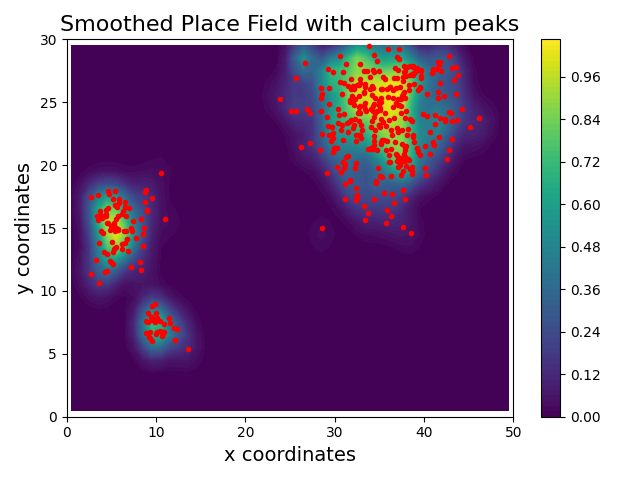

In [15]:


plt.figure()
plt.contourf(spatial_metrics_output['x_center_bins'],spatial_metrics_output['y_center_bins'],spatial_metrics_output['place_field_smoothed'],100,cmap='viridis')
plt.plot(spatial_metrics_output['x_peaks_location'],spatial_metrics_output['y_peaks_location'],color = 'red',linestyle='',marker='.',markersize=6)
plt.colorbar()
plt.title('Smoothed Place Field with calcium peaks',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
# plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()



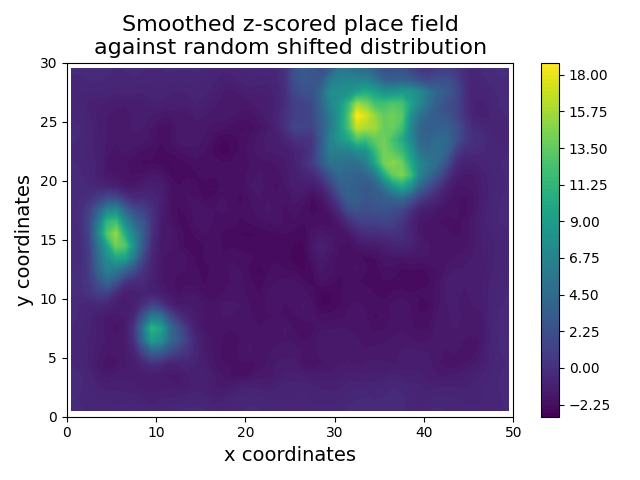

In [16]:

mean_place_field_shifted = np.nanmean(spatial_metrics_output['place_field_smoothed_shifted'],0)
std_place_field_shifted = np.nanstd(spatial_metrics_output['place_field_smoothed_shifted'],0)
place_field_smoothed = spatial_metrics_output['place_field_smoothed'].copy()
place_field_smoothed_zscored = (place_field_smoothed - mean_place_field_shifted)/std_place_field_shifted

plt.figure()
plt.contourf(spatial_metrics_output['x_center_bins'],spatial_metrics_output['y_center_bins'],place_field_smoothed_zscored,100)
plt.colorbar()
plt.title('Smoothed z-scored place field\nagainst random shifted distribution',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()


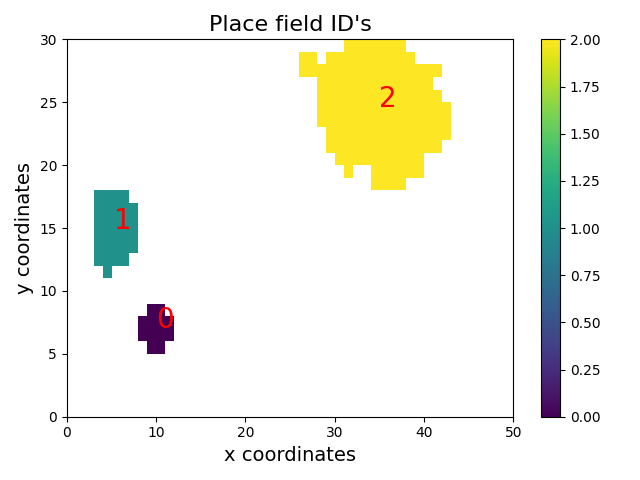

In [17]:

place_cells_x_center_coord = spatial_metrics_output['islands_x_max']
place_cells_y_center_coord = spatial_metrics_output['islands_y_max']

plt.figure()
plt.pcolormesh(spatial_metrics_output['x_center_bins'],spatial_metrics_output['y_center_bins'],spatial_metrics_output['place_field_identity'])
plt.colorbar()


for counter,(x, y) in enumerate(zip(place_cells_x_center_coord, place_cells_y_center_coord)):
    plt.text(x, y, str(counter), color='red',fontsize=20)

plt.title("Place field ID's",fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()



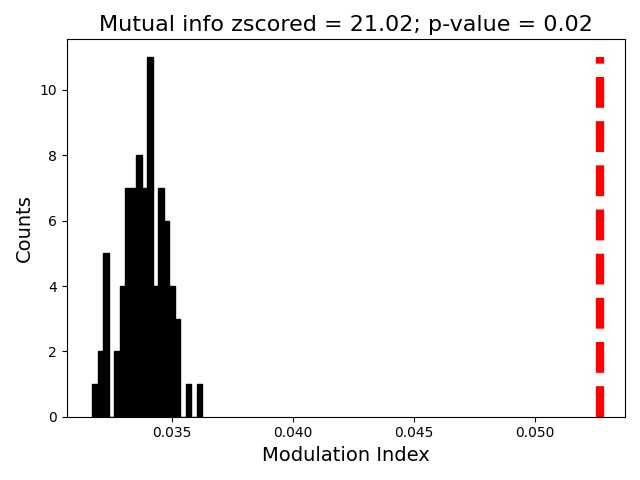

In [23]:
statistic = be.calculate_p_value(spatial_metrics_output['mutual_info_original'], spatial_metrics_output['mutual_info_shifted'], alternative='two-sided')

counts,bins = np.histogram(spatial_metrics_output['mutual_info_shifted'],20)
bins_centers = bins[0:-1] + np.diff(bins)
bin_width = np.diff(bins_centers)[0]

plt.figure()
plt.bar(bins_centers,counts,color='black',width=bin_width,linewidth=1,edgecolor='black')
plt.plot([spatial_metrics_output['mutual_info_original'],spatial_metrics_output['mutual_info_original']],[0,np.max(counts)],'r--',linewidth=6)
plt.title("Mutual info zscored = {0:.2f}; p-value = {1:.2f}".format(spatial_metrics_output['mutual_info_zscored'],statistic.p_value),fontsize=16)
plt.xlabel('Modulation Index',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.tight_layout()
plt.show()


In [24]:
# Place field extension relative to the whole enviroment
spatial_metrics_output['place_cell_extension_absolute']


array([0.008     , 0.01933333, 0.09333333])

In [25]:
# Place field extension relative to enviroment occupancy
spatial_metrics_output['place_cell_extension_relative']


array([0.0089153 , 0.02154532, 0.10401189])

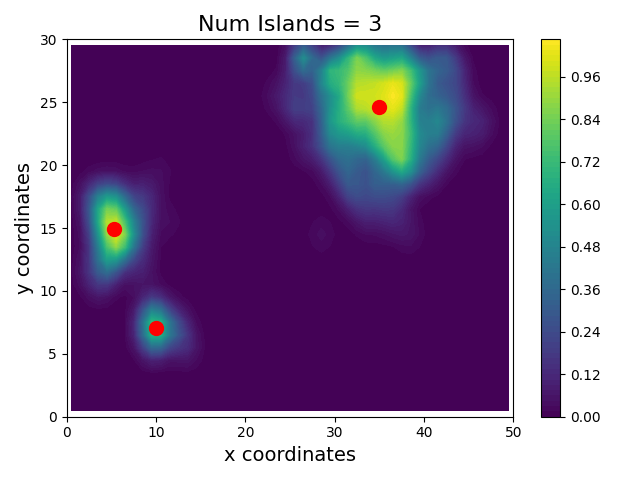

In [31]:
place_field_x_center_coord = spatial_metrics_output['islands_x_max']
place_field_y_center_coord = spatial_metrics_output['islands_y_max']

plt.figure()
plt.contourf(spatial_metrics_output['x_center_bins'],spatial_metrics_output['y_center_bins'],spatial_metrics_output['place_field_smoothed'],100)
# plt.pcolormesh(spatial_metrics_output['x_center_bins'],spatial_metrics_output['y_center_bins'],spatial_metrics_output['place_field_smoothed'])
plt.colorbar()
plt.plot(place_field_x_center_coord,place_field_y_center_coord,'r.',markersize=20)

plt.title('Num Islands = {0}'.format(spatial_metrics_output['num_of_islands']) ,fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()


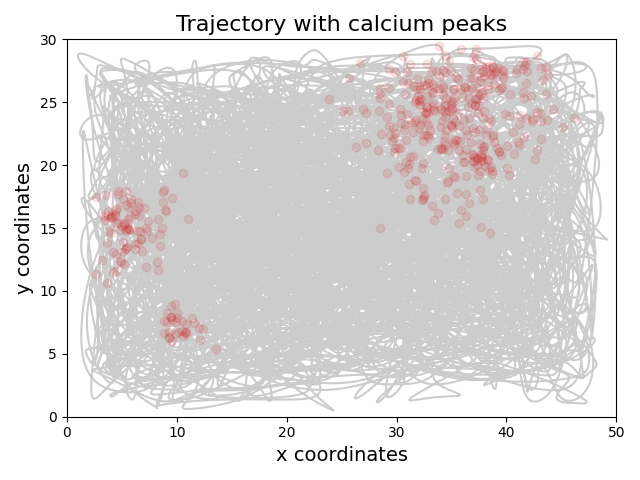

In [27]:

x_peaks_location = spatial_metrics_output['x_peaks_location']
y_peaks_location = spatial_metrics_output['y_peaks_location']

plt.figure()
plt.plot(x_coordinates,y_coordinates,'k',alpha=0.2)
plt.scatter(x_peaks_location,y_peaks_location,alpha=0.1,color='red')
plt.title('Trajectory with calcium peaks',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()


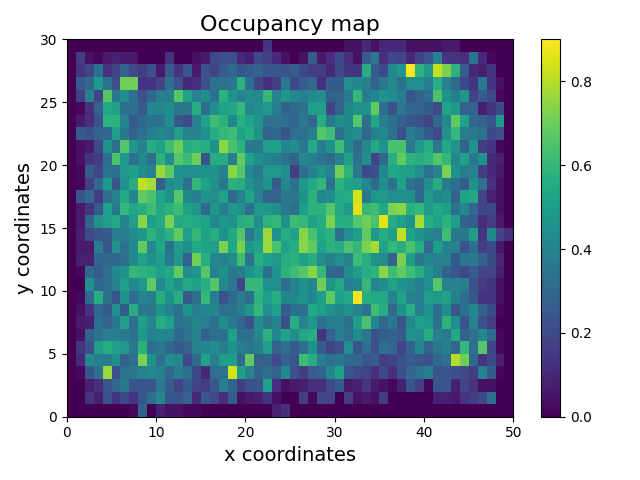

In [28]:

plt.figure()
plt.pcolormesh(spatial_metrics_output['x_center_bins'],spatial_metrics_output['y_center_bins'],spatial_metrics_output['timespent_map'])
plt.colorbar()
plt.title('Occupancy map',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()


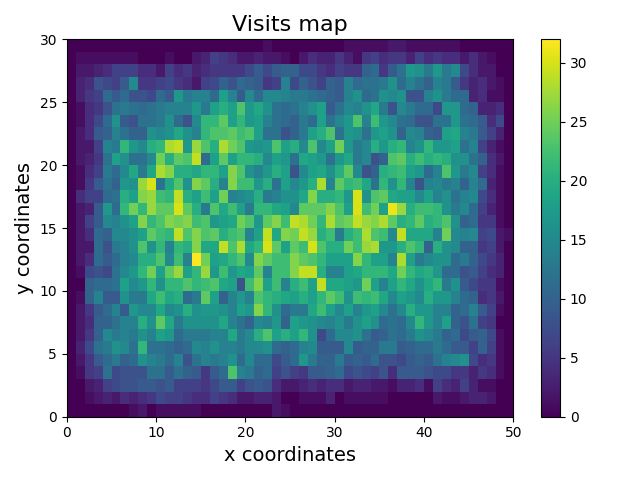

In [29]:

plt.figure()
plt.pcolormesh(spatial_metrics_output['x_center_bins'],spatial_metrics_output['y_center_bins'],spatial_metrics_output['visits_map'])
plt.colorbar()
plt.title('Visits map',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()


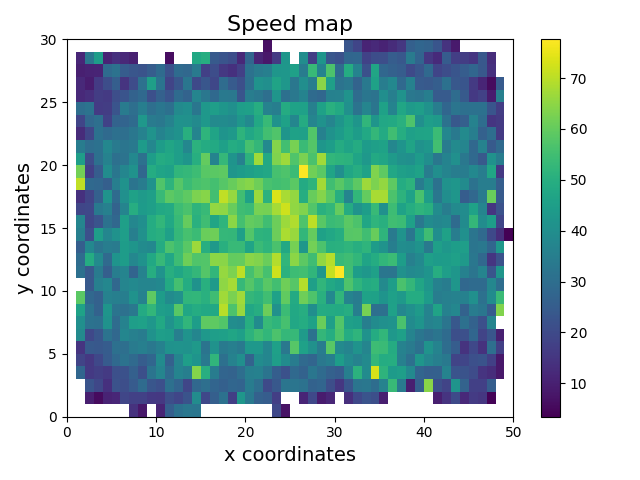

In [30]:


plt.figure()
plt.pcolormesh(spatial_metrics_output['x_center_bins'],spatial_metrics_output['y_center_bins'],spatial_metrics_output['speed_map'])
plt.colorbar()
plt.title('Speed map',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()
